In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("../Question_21_30/imori_dark.jpg").astype(np.float)
H, W, C = img.shape

# Trans [0, 255]
a, b = 0., 255.

c = img.min()
d = img.max()

out = img.copy()

out = (b-a) / (d - c) * (out - c) + a
out[out < a] = a
out[out > b] = b
out = out.astype(np.uint8)

# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("out_his.png")
plt.show()

# Save result
cv2.imwrite("out.jpg", out)

<Figure size 640x480 with 1 Axes>

True

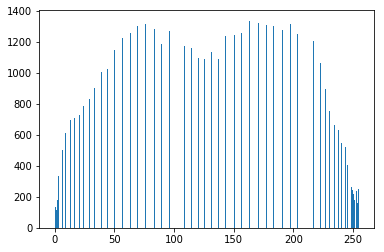

True

In [3]:
# Histogram flattening
S = H * W * C * 1.

out = img.copy()

sum_h = 0.
z_max = 255.

for i in range(1, 255):
    ind = np.where(img == i)
    sum_h += len(img[ind])
    z_prime = z_max / S * sum_h
    out[ind] = z_prime

out = out.astype(np.uint8)

# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("out_his.png")
plt.show()

# Save result
cv2.imwrite("out.jpg", out)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("../Question_21_30/imori_gamma.jpg").astype(np.float)

# Gammma correction
c = 1.
g = 2.2

out = img.copy()
out /= 255.
out = (1/c * out) ** (1/g)

out *= 255
out = out.astype(np.uint8)

# Save result
cv2.imwrite("out.jpg", out)

True

In [13]:
# Read image
_img = cv2.imread("../Question_21_30/imori.jpg").astype(np.float32)
H, W, C = _img.shape


# Affine
A = 30.
theta = - np.pi * A / 180.

a = np.cos(theta)
b = -np.sin(theta)
c = np.sin(theta)
d = np.cos(theta)
tx = 0
ty = 0

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.round(H).astype(np.int)
W_new = np.round(W).astype(np.int)
out = np.zeros((H_new, W_new, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

adbc = a * d - b * c
x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

dcx = (x.max() + x.min()) // 2 - W // 2
dcy = (y.max() + y.min()) // 2 - H // 2

x -= dcx
y -= dcy

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

out[y_new, x_new] = img[y, x]
out = out.astype(np.uint8)

# Save result
cv2.imwrite("out.jpg", out)

True